# Implementation of the 3D Segmentation Method by S. Gauthier et al.

This notebook presents my proof-of-concept implementation of the 3D object segmentation method proposed by **S. Gauthier et al.** in their paper:

> Gauthier, S., Puech, W., Bénière, R., & Subsol, G. (2017). *Digitized 3D mesh segmentation based on curvature analysis.*  
> Electronic Imaging, 2017(20), 33–38. https://doi.org/10.2352/ISSN.2470-1173.2017.20.3DIPM-005

The goal of this work is to reproduce, in Python, the main steps of the method.

**Remark:** This project is a *work in progress*.

---

## Objectives

This segmentation method is based on local curvature analysis. The main steps of the code will go as follow:

0. Import useful libraries
1. Load .stl file  
2. Compute local curvature at each vertex  
3. Plot & analyze curvature distribution
4. Segmentation based on previous analysis
5. Recursivity for complex shapes



##### 0. Libraries
For this code, the following libraries are required :
- `numpy`
- `numpy-stl` (we will only use the function `mesh`)
- `matplotlib` (we will use the module `matplotlib.pyplot` and the function `Poly3DCollection`)


In [2]:
import numpy as np
from stl import mesh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

##### 1. Loading the STL file


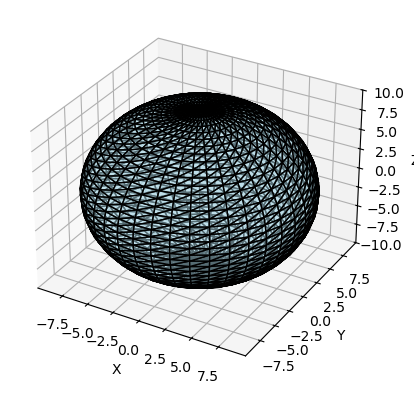

In [3]:
## STEP 1 : Load STL File

file_path = "./sphere.stl"  # path to your STL file
stl_mesh = mesh.Mesh.from_file(file_path) # to load the STL file


# Visualisation of the mesh

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
triangles = stl_mesh.vectors
ax.add_collection3d(Poly3DCollection(triangles, facecolor='lightblue', edgecolor='k', alpha=0.5))
points = triangles.reshape(-1, 3)
ax.set_xlim(points[:,0].min(), points[:,0].max())
ax.set_ylim(points[:,1].min(), points[:,1].max())
ax.set_zlim(points[:,2].min(), points[:,2].max())
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')

#ax.auto_scale_xyz(points[:,0], points[:,1], points[:,2])

plt.show()